In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import talib
import pandas_datareader as pdr
#import sklearn.preprocessing as preprocessing
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns; sns.set()
from datetime import datetime
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from itertools import compress
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [20]:
'''KOSPI 전체 종목 크롤링 (기존에 데이터가 있다면 크롤링 하지 않아도 무방함) _ 시간 오래걸림 '''

'''
stock_type = {
'kospi': 'stockMkt',
'kosdaq': 'kosdaqMkt'
}
quit()
# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
    # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
    code = code.strip()
    return code

# download url 조합
def get_download_stock(market_type=None):
    market_type = stock_type[market_type]
    download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
    download_link = download_link + '?method=download'
    download_link = download_link + '&marketType=' + market_type
    df = pd.read_html(download_link, header=0)[0]
    return df

# kospi 종목코드 목록 다운로드
def get_download_kospi():
    df = get_download_stock('kospi')
    df.종목코드 = df.종목코드.map('{:06d}.KS'.format)
    return df

# kosdaq 종목코드 목록 다운로드
def get_download_kosdaq():
    df = get_download_stock('kosdaq')
    df.종목코드 = df.종목코드.map('{:06d}.KQ'.format)
    return df

# kospi, kosdaq 종목코드 각각 다운로드
kospi_df = get_download_kospi()
#kosdaq_df = get_download_kosdaq()

# data frame정리
kospi_df = kospi_df[['회사명', '종목코드']]
#kosdaq_df = kosdaq_df[['회사명', '종목코드']]

# data frame title 변경 '회사명' = name, 종목코드 = 'code'
kospi_df = kospi_df.rename(columns={'회사명': 'name', '종목코드': 'code'})
#kosdaq_df = kosdaq_df.rename(columns={'회사명': 'name', '종목코드': 'code'})


#시계열 데이터 구간 정해주기
start_date = datetime(2001,1,1)
end_date = datetime.now()

#디렉토리 생성
directory = "Data"
path = os.getcwd()
try:
    os.mkdir(path + "/" + directory)
except:
    pass

for i in range(len(kospi_df)):
    try:
        df = pdr.get_data_yahoo(kospi_df.iloc[i,1], start_date, end_date)
        df.to_csv(f'{directory}/{kospi_df.iloc[i,0]}.csv')
    except:
        print(f"Loading Error: {kospi_df.iloc[i,0]}")
        pass

'''

'\nstock_type = {\n\'kospi\': \'stockMkt\',\n\'kosdaq\': \'kosdaqMkt\'\n}\nquit()\n# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수\ndef get_code(df, name):\n    code = df.query("name==\'{}\'".format(name))[\'code\'].to_string(index=False)\n    # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거\n    code = code.strip()\n    return code\n\n# download url 조합\ndef get_download_stock(market_type=None):\n    market_type = stock_type[market_type]\n    download_link = \'http://kind.krx.co.kr/corpgeneral/corpList.do\'\n    download_link = download_link + \'?method=download\'\n    download_link = download_link + \'&marketType=\' + market_type\n    df = pd.read_html(download_link, header=0)[0]\n    return df\n\n# kospi 종목코드 목록 다운로드\ndef get_download_kospi():\n    df = get_download_stock(\'kospi\')\n    df.종목코드 = df.종목코드.map(\'{:06d}.KS\'.format)\n    return df\n\n# kosdaq 종목코드 목록 다운로드\ndef get_download_kosdaq():\n    df = get_download_stock(\'kosdaq\')\n    df.종목코드 = df.종목코드.map(\'{:06d}.KQ\'.format)

In [21]:
'''
외부 시장 데이터 저장 (코스피, 나스닥, s&p500, 다우존스, 환율)

시계열 데이터 기간과 경로 할당
start_date = datetime(2001,1,1)
end_date = datetime.now()

디렉토리 생성
directory = 'Data_mkt'
path_dir = os.getcwd()
try:
    os.mkdir(path_dir + "/" + directory)
except:
    pass

pdr.get_data_yahoo('^KS11', start_date, end_date).to_csv(f'{path_dir}/{directory}/kospi.csv') #코스피 지수
pdr.get_data_yahoo('^IXIC', start_date, end_date).to_csv(f'{path_dir}/{directory}/nasdaq.csv') #나스닥 지수
pdr.get_data_yahoo('^GSPC', start_date, end_date).to_csv(f'{path_dir}/{directory}/s&p500.csv') #S&P500 지수
pdr.get_data_yahoo('^DJI', start_date, end_date).to_csv(f'{path_dir}/{directory}/dowjones.csv') #DowJones 지수
pdr.get_data_yahoo('KRW=X', start_date, end_date).to_csv(f'{path_dir}/{directory}/exch.csv') #원달러 환율 지수
'''

'\n외부 시장 데이터 저장 (코스피, 나스닥, s&p500, 다우존스, 환율)\n\n시계열 데이터 기간과 경로 할당\nstart_date = datetime(2001,1,1)\nend_date = datetime.now()\n\n디렉토리 생성\ndirectory = \'Data_mkt\'\npath_dir = os.getcwd()\ntry:\n    os.mkdir(path_dir + "/" + directory)\nexcept:\n    pass\n\npdr.get_data_yahoo(\'^KS11\', start_date, end_date).to_csv(f\'{path_dir}/{directory}/kospi.csv\') #코스피 지수\npdr.get_data_yahoo(\'^IXIC\', start_date, end_date).to_csv(f\'{path_dir}/{directory}/nasdaq.csv\') #나스닥 지수\npdr.get_data_yahoo(\'^GSPC\', start_date, end_date).to_csv(f\'{path_dir}/{directory}/s&p500.csv\') #S&P500 지수\npdr.get_data_yahoo(\'^DJI\', start_date, end_date).to_csv(f\'{path_dir}/{directory}/dowjones.csv\') #DowJones 지수\npdr.get_data_yahoo(\'KRW=X\', start_date, end_date).to_csv(f\'{path_dir}/{directory}/exch.csv\') #원달러 환율 지수\n'

In [22]:
'''필요한 데이터 불러오기'''

import os
path_dir = os.getcwd()

'''분석하려는 주식 종목'''
asset_name = 'bitcoin'

tmp1 = pd.read_csv(f"{path_dir}/Data/{asset_name}.csv", index_col='Date', parse_dates=['Date']) #자산지수
tmp2 = pd.read_csv(f"{path_dir}/Data_mkt/kospi.csv", index_col='Date', parse_dates=['Date']) #코스피지수
tmp3 = pd.read_csv(f'{path_dir}/Data_mkt/nasdaq.csv', index_col='Date', parse_dates=['Date']) #나스닥 지수
tmp4 = pd.read_csv(f'{path_dir}/Data_mkt/s&p500.csv', index_col='Date', parse_dates=['Date']) #S&P500 지수
tmp5 = pd.read_csv(f'{path_dir}/Data_mkt/dowjones.csv', index_col='Date', parse_dates=['Date']) #DowJones 지수
tmp6 = pd.read_csv(f'{path_dir}/Data_mkt/exch.csv', index_col='Date', parse_dates=['Date']) #원달러 환율 지수
data = [tmp1, tmp2, tmp3, tmp4, tmp5, tmp6]

In [23]:
'''시간 전처리'''

def process_time (df):

    '''가장 짧은 시간으로 통일'''
    start_date_list = []
    end_date_list = []
    for i in df:
        start_date_list.append(i.index[0])
        end_date_list.append(i.index[len(i)-1])
    start_date = max(start_date_list)
    end_date = min(end_date_list)
    date_index = pd.date_range(start_date, end_date)

    '''시간대 맞춰서 데이터 가져오기'''
    tmp = pd.DataFrame(index=date_index)
    for i in df:
        if i is tmp1:
            name = "asset"
        elif i is tmp2:
            name = 'kospi'
        elif i is tmp3:
            name = 'nasdaq'
        elif i is tmp4:
            name = 'snp500'
        elif i is tmp5:
            name = 'dowjones'
        elif i is tmp6:
            name = 'ex_rate'
        for j in i.columns:
            tmp[f'{name}_{j}'] = i[j]
    #tmp 저장 완료

    '''외부데이터 결측치 처리'''
    for row_index, value in tmp.iterrows():
        day = datetime.weekday(row_index)
        if day == (5 or 6):
            tmp.drop(row_index, axis=0, inplace=True)

    '''자산데이터 결측치 처리'''
    tmp_col = tmp.columns
    col_list = []
    for i in range(len(tmp.columns)-1):
        if tmp_col[i][0:5] == "asset":
            col_list.append(tmp_col[i])
    for index, row in tmp[col_list].iterrows():
        if row.isnull().sum() != 0:
            tmp = tmp.drop(index = index)

    '''외부데이터 빈 값, 앞방향 채우기 (당일 휴장으로 인한 과거데이터 연속)'''
    tmp = tmp.fillna(method='ffill')

    return tmp

df = process_time(data)
df

,asset_High,asset_Low,asset_Open,asset_Close,asset_Volume,asset_Adj Close,kospi_High,kospi_Low,kospi_Open,kospi_Close,...,dowjones_Open,dowjones_Close,dowjones_Volume,dowjones_Adj Close,ex_rate_High,ex_rate_Low,ex_rate_Open,ex_rate_Close,ex_rate_Volume,ex_rate_Adj Close
2014-09-17,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015,2062.620117,2051.110107,2052.060059,2062.610107,...,17131.009766,17156.849609,87810000.0,17156.849609,1046.650024,1038.550049,1042.229980,1033.599976,0.0,1033.599976
2014-09-18,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002,2063.260010,2044.170044,2058.209961,2047.739990,...,17163.730469,17265.990234,85300000.0,17265.990234,1047.430054,1036.000000,1041.800049,1042.599976,0.0,1042.599976
2014-09-19,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990,2062.370117,2053.659912,2057.560059,2053.820068,...,17267.210938,17279.740234,349620000.0,17279.740234,1047.430054,1036.000000,1041.800049,1042.599976,0.0,1042.599976
2014-09-21,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014,2062.370117,2053.659912,2057.560059,2053.820068,...,17267.210938,17279.740234,349620000.0,17279.740234,1044.250000,1022.200012,1022.799988,1022.799988,0.0,1022.799988
2014-09-22,406.915985,397.130005,399.100006,402.152008,2.412760e+07,402.152008,2053.300049,2032.359985,2053.300049,2039.270020,...,17271.710938,17172.679688,74300000.0,17172.679688,1044.729980,1036.400024,1043.030029,1039.800049,0.0,1039.800049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,57482.167969,52496.585938,56509.164062,53598.246094,3.978913e+10,53598.246094,2975.439941,2927.550049,2935.929932,2968.330078,...,34692.781250,34580.078125,439550000.0,34580.078125,1185.099976,1175.439941,1175.880005,1176.770020,0.0,1176.770020
2021-12-05,49768.148438,47857.496094,49201.519531,49368.847656,3.719820e+10,49368.847656,2975.439941,2927.550049,2935.929932,2968.330078,...,34692.781250,34580.078125,439550000.0,34580.078125,1185.099976,1175.439941,1175.880005,1176.770020,0.0,1176.770020
2021-12-06,50929.519531,47281.035156,49413.480469,50582.625000,3.770731e+10,50582.625000,2983.500000,2932.489990,2954.820068,2973.250000,...,34633.429688,35227.031250,416720000.0,35227.031250,1185.140015,1178.739990,1184.560059,1183.140015,0.0,1183.140015
2021-12-07,51934.781250,50175.808594,50581.828125,50700.085938,3.367681e+10,50700.085938,2992.310059,2960.899902,2973.840088,2991.719971,...,35423.988281,35719.429688,474940000.0,35719.429688,1183.500000,1175.369995,1179.670044,1180.560059,0.0,1180.560059


In [24]:
'''변수 데이터 처리'''

def process_factors (df):
    start_date = df.index[0]
    end_date = df.index[len(df)-1]
    date_index = pd.date_range(start_date, end_date)
    tmp = pd.DataFrame(index=date_index)

    '''다음날 등락여부'''
    df['asset_Close_pct'] = df['asset_Close'].pct_change()
    df = df.dropna()
    for i in df.index:
        #if (df.loc[i,'asset_Close'] - df.loc[i,'asset_Open']) > 0:
        if df.loc[i,'asset_Close_pct'] > 0:
            df.loc[i,'signal'] = 1
        else:
            df.loc[i,'signal'] = 0

    df['signal'] = df['signal'].shift(-1) #하루 다음 예측치 이므로 땡겨주기

    '''내재 데이터(가격)'''
    df['asset_high-low_pct'] = (df['asset_High'] - df['asset_Low']).pct_change() #/ df['asset_Low']
    df['asset_close-open_pct'] = (df['asset_Close'] - df['asset_Open']).pct_change() #/ df['asset_Open']
    df['asset_delta_vol_pct'] = df['asset_Volume'].pct_change()

    '''기술 데이터(기술적 지표)'''
    df['MA5_20_ratio'] = talib.SMA(np.asarray(df['asset_Close']), timeperiod=5)/talib.SMA(np.asarray(df['asset_Close']), timeperiod=20)
    df['MA5_20_ratio_pct'] = df['MA5_20_ratio'].pct_change()
    df['MA20_60_ratio'] = talib.SMA(np.asarray(df['asset_Close']), timeperiod=20)/talib.SMA(np.asarray(df['asset_Close']), timeperiod=60)
    df['MA20_60_ratio_pct'] = df['MA20_60_ratio'].pct_change()
    df['RSI14'] = talib.RSI(np.asarray(df['asset_Close']), 14) / 100

    '''외부 데이터(시장 지표)'''
    df['kospi_rtn'] = df['kospi_Close'].pct_change()
    df['nasdaq_rtn'] = df['nasdaq_Close'].pct_change(-1)  #미국과 한국의 시차가 있으니 하루 땡겨주기 (한국시장이 미국시장보다 먼저열림)
    df['snp500_rtn'] = df['snp500_Close'].pct_change(-1)  #미국과 한국의 시차가 있으니 하루 땡겨주기 (한국시장이 미국시장보다 먼저열림)
    df['dowjones_rtn'] = df['dowjones_Close'].pct_change(-1)  #미국과 한국의 시차가 있으니 하루 땡겨주기 (한국시장이 미국시장보다 먼저열림)
    df['ex_rate_pct'] = df['ex_rate_Close'].pct_change()

    '''데이터 분류'''
    feature1 = ['asset_high-low_pct', 'asset_close-open_pct','asset_delta_vol_pct']
    feature2 = ['MA5_20_ratio_pct','MA20_60_ratio_pct','RSI14']
    feature3 = ['kospi_rtn', 'nasdaq_rtn', 'snp500_rtn', 'dowjones_rtn', 'ex_rate_pct']
    feature4 = ['signal']
    X_factors = feature1 + feature2 + feature3
    Y_factors = feature4
    XY_factors = Y_factors + X_factors
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    #df.to_csv('df.csv')

    return df, X_factors, Y_factors, XY_factors

df, X_factors, Y_factors, XY_factors = process_factors(df)
df[XY_factors]

,signal,asset_high-low_pct,asset_close-open_pct,asset_delta_vol_pct,MA5_20_ratio_pct,MA20_60_ratio_pct,RSI14,kospi_rtn,nasdaq_rtn,snp500_rtn,dowjones_rtn,ex_rate_pct
2014-11-27,1.0,-0.519441,-0.891228,-0.529719,0.004935,0.007740,0.492965,0.000631,-0.000899,0.002549,-0.000027,-0.004874
2014-11-28,1.0,3.270239,-9.501192,1.623048,-0.000171,0.005776,0.518349,-0.000661,0.000000,0.000000,0.000000,-0.003084
2014-11-30,1.0,-0.621949,-0.641314,-0.599310,-0.003205,0.004767,0.524402,0.000000,0.013597,0.006876,0.002894,0.000000
2014-12-01,1.0,-0.241379,-0.607407,0.279360,-0.002788,0.005922,0.529174,-0.007856,-0.005984,-0.006344,-0.005747,-0.009644
2014-12-02,0.0,-0.116973,1.073291,0.051101,0.004521,0.004843,0.537803,0.000310,-0.003908,-0.003751,-0.001846,0.018466
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,0.0,-0.415695,-3.297729,-0.121499,0.019234,-0.012107,0.444664,0.015708,0.019612,0.008521,0.001727,-0.004861
2021-12-03,0.0,2.428634,2.936042,0.228819,-0.003180,-0.012699,0.387781,0.007830,0.000000,0.000000,0.000000,-0.000289
2021-12-05,1.0,-0.616764,-1.057483,-0.065117,-0.016847,-0.015036,0.322521,0.000000,-0.009174,-0.011595,-0.018365,0.000000
2021-12-06,1.0,0.909549,5.987137,0.013686,-0.011878,-0.014100,0.356016,0.001657,-0.029437,-0.020287,-0.013785,0.005413


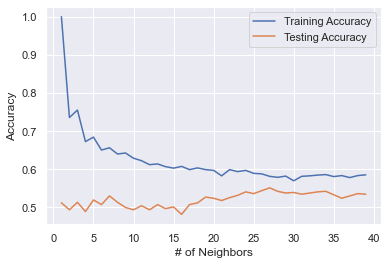

{'k = 1': 51.21, 'k = 2': 49.39, 'k = 3': 51.36, 'k = 4': 48.94, 'k = 5': 51.97, 'k = 6': 50.76, 'k = 7': 53.03, 'k = 8': 51.36, 'k = 9': 50.0, 'k = 10': 49.39, 'k = 11': 50.45, 'k = 12': 49.39, 'k = 13': 50.76, 'k = 14': 49.7, 'k = 15': 50.15, 'k = 16': 48.18, 'k = 17': 50.76, 'k = 18': 51.21, 'k = 19': 52.73, 'k = 20': 52.42, 'k = 21': 51.82, 'k = 22': 52.58, 'k = 23': 53.18, 'k = 24': 54.09, 'k = 25': 53.64, 'k = 26': 54.39, 'k = 27': 55.15, 'k = 28': 54.24, 'k = 29': 53.79, 'k = 30': 53.94, 'k = 31': 53.48, 'k = 32': 53.79, 'k = 33': 54.09, 'k = 34': 54.24, 'k = 35': 53.33, 'k = 36': 52.42, 'k = 37': 53.03, 'k = 38': 53.64, 'k = 39': 53.48}
최대 예측 일치 비율: k = 27: 55.15
최소 예측 일치 비율: k = 16: 48.18

Most Accurate k: 27

테스트 데이터 개수: 660
예측과 일치한 데이터 개수: 364
일치 비율: 55.15 %
Accuracy : 0.552
Precision : 0.563
Recall : 0.734
F1 : 0.637


In [25]:
'''best_k 찾기'''

def process_knn_k (df, X_factors, Y_factors):

    '''Train, Test분류 (시계열 데이터 이므로 섞지 않는 것이 중요)'''
    X = df[X_factors]
    Y = df[Y_factors[0]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, shuffle=False) #섞지않고

    '''전일 대비 금일의 변화율로 모든 변수의 스케일이 동일 > 정규화 진행 X'''
    #preprocessor = preprocessing.Normalizer()
    #X_train = preprocessor.fit_transform(X_train)
    #X_test = preprocessor.transform(X_test)

    training_accuracy = []
    test_accuracy = []
    dict = {}
    n_test = len(Y_test)
    k_settings = range(1,40)
    for i in k_settings:
        ploan_knn = neighbors.KNeighborsClassifier(n_neighbors=i)
        ploan_knn.fit(X_train, Y_train)
        training_accuracy.append(ploan_knn.score(X_train, Y_train))
        test_accuracy.append(ploan_knn.score(X_test, Y_test))
        Y_predict = ploan_knn.predict(X_test)

        a = round((sum(Y_test == Y_predict)/n_test)*100, 2)
        dict[f'k = {i}'] = a

    plt.plot(k_settings, training_accuracy, label="Training Accuracy")
    plt.plot(k_settings, test_accuracy, label="Testing Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("# of Neighbors")
    plt.legend()
    plt.show()

    print(dict)
    max_dict = max(dict, key=lambda x: dict[x])
    min_dict = min(dict, key=lambda x: dict[x])
    best_k_temp = test_accuracy==max(test_accuracy)
    best_k = list(compress(k_settings, best_k_temp))[0]
    print(f'최대 예측 일치 비율: {max_dict}: {dict.get(max_dict)}')
    print(f'최소 예측 일치 비율: {min_dict}: {dict.get(min_dict)}')
    print('\nMost Accurate k:', best_k)

    '''best k 에서의 모델 성능 평가'''

    best_ploan_knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
    best_ploan_knn.fit(X_train, Y_train)
    best_ploan_knn.predict(X_test)

    n_test = len(Y_test)
    Y_predict = best_ploan_knn.predict(X_test)

    print('\n테스트 데이터 개수:', n_test)
    print('예측과 일치한 데이터 개수:', sum(Y_test == Y_predict))
    print('일치 비율:',round((sum(Y_test == Y_predict)/n_test)*100,2),'%')

    accuracy = accuracy_score(Y_test, Y_predict)
    precision = precision_score(Y_test, Y_predict)
    recall = recall_score(Y_test, Y_predict)
    f1 = f1_score(Y_test, Y_predict)
    print('Accuracy : {0:.3f}'.format(accuracy))
    print('Precision : {0:.3f}'.format(precision))
    print('Recall : {0:.3f}'.format(recall))
    print('F1 : {0:.3f}'.format(f1))

    return best_k

best_k = process_knn_k(df, X_factors, Y_factors)



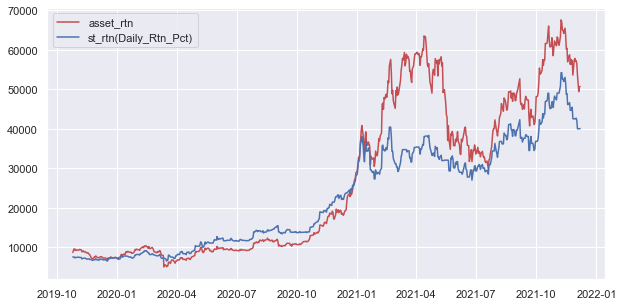

bitcoin's Buy and Hold strategy return: 485.4%
bitcoin's KNN strategy return: 434.74%
bitcoin's Share Ratio: -0.3285638938175325


In [26]:
'''best k와 KNN을 활용한 투자 전략 수익률 테스트'''

def trading_strategy_rtn (best_k, df, X_factors, Y_factors):

    X = df[X_factors]
    Y = df[Y_factors[0]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, shuffle=False) #섞지않고


    best_ploan_knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
    best_ploan_knn.fit(X_train, Y_train)
    split = int(0.7*len(df))

    '''KNN예측 등락 시그널'''

    df['st_signal'] = best_ploan_knn.predict(X)

    '''초기 투자금'''

    initial_fund = df[split:]['asset_Open'][0]
    #현실의 경우, 투자금이 100만원일 경우 몇주를 사게되는지 따져봐야하지만, 일단은 open가격에 사는것으로 가정

    '''시장 수익률 데이터(시장 종가)'''

    df['mkt_rtn'] = df[split:]['asset_Close']# - df[split:]['asset_Open'][0]
    cum_mkt_rtn = df[split:]['mkt_rtn']

    '''KNN전략 수익률 데이터(일일 매수매도)'''

    df['st_signal'] = df['st_signal'].shift(1) #계산에 활용하기 위해 한칸 미뤄줌
    #df['rtn_pct'] = (df['asset_Close'] - df['asset_Open']) / df['asset_Open']
    df['rtn_pct'] = df['asset_Close'].pct_change()
    #슬리피지의 존재 여부가 수익률에 큰 영향을 주고 있음
    #전날 종가의 가격으로 구매가 가능하다면 큰 수익률을 얻을 수 있으나, 현재의 시가로 구매하게 된다면 수익률이 크게 낮아짐
    #이는 슬리피지로 인한 효과를 생각해야 함을 시사함.

    for i in df[split:].index:
        if df.loc[i, 'st_signal'] == 0:
            df.loc[i, 'st_rtn'] = initial_fund #오르지 않음을 예측시 매수매도가 이뤄지지 않으니 초기투자금 그대로
        else:
            df.loc[i, 'st_rtn'] = ( df.loc[i, 'rtn_pct'] + 1 ) * initial_fund
            initial_fund = df.loc[i, 'st_rtn'] #오른다고 예측시 매수매도 이후, 당일 상승분을 가져감

    df['st_real_rtn'] = df[split:]['st_rtn']# - df[split:]['asset_Open'][0]
    cum_st_rtn = df[split:]['st_real_rtn']

    try:
        os.mkdir(path_dir + "/" + "Data_pic")
    except:
        pass

    plt.figure(figsize=(10,5))
    plt.plot(cum_mkt_rtn, color='r', label='asset_rtn')
    plt.plot(cum_st_rtn, color='b', label='st_rtn(Daily_Rtn_Pct)')
    plt.legend()
    plt.savefig(f'{path_dir}/Data_pic/Return Compare on KNN modeling_{asset_name}.png')
    plt.show()

    net_mkt_rtn = ((cum_mkt_rtn[len(cum_mkt_rtn)-1] - cum_mkt_rtn[0]) / cum_mkt_rtn[0]) * 100
    net_st_rtn = ((cum_st_rtn[len(cum_st_rtn)-1] - cum_st_rtn[0]) / cum_st_rtn[0]) * 100
    print(f"{asset_name}'s Buy and Hold strategy return: {round(net_mkt_rtn,2)}%")
    print(f"{asset_name}'s KNN strategy return: {round(net_st_rtn,2)}%")

    #샤프비율로 비교 ( (자산의 기대수익률 - 기준지표의 기대수익률) / 자산 수익률의 표준편차 : 기준지표 대비 초과수익비율)

    std = cum_st_rtn.std()
    sharpe = (cum_st_rtn - cum_mkt_rtn)/std
    sharpe = sharpe.mean()
    print(f"{asset_name}'s Share Ratio: {sharpe}")

trading_strategy_rtn(best_k, df, X_factors, Y_factors)

In [27]:

# '''코스피 전체 데이터 분석 및 승률 조회'''
#
# '''승률데이터 저장'''
# data_dict = {}
#
# '''데이터가 충분히 길지 않아서 저장 안될 경우'''
# error_list = []
#
# '''반복용'''
# path_dir = os.getcwd()
# file_list = os.listdir(f'{path_dir}/Data')
#
# tmp2 = pd.read_csv(f"{path_dir}/Data_mkt/kospi.csv", index_col='Date', parse_dates=['Date']) #코스피지수
# tmp3 = pd.read_csv(f'{path_dir}/Data_mkt/nasdaq.csv', index_col='Date', parse_dates=['Date']) #나스닥 지수
# tmp4 = pd.read_csv(f'{path_dir}/Data_mkt/s&p500.csv', index_col='Date', parse_dates=['Date']) #S&P500 지수
# tmp5 = pd.read_csv(f'{path_dir}/Data_mkt/dowjones.csv', index_col='Date', parse_dates=['Date']) #DowJones 지수
# tmp6 = pd.read_csv(f'{path_dir}/Data_mkt/exch.csv', index_col='Date', parse_dates=['Date']) #원달러 환율 지수
#
# for i in file_list:
#     try:
#         asset_name = i
#         tmp1 = pd.read_csv(f"{path_dir}/Data/{i}", index_col='Date', parse_dates=['Date'])
#         data = [tmp1, tmp2, tmp3, tmp4, tmp5, tmp6]
#
#         tmp = process_time(data)
#         df, X_factors, Y_factors, XY_factors = process_factors(tmp)
#
#         X = df[X_factors]
#         Y = df[Y_factors[0]]
#
#         X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, shuffle=False) #섞지않고
#
#         training_accuracy = []
#         test_accuracy = []
#         k_settings = range(1, 40)
#
#         for k in k_settings:
#             ploan_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
#             ploan_knn.fit(X_train, Y_train)
#             training_accuracy.append(ploan_knn.score(X_train, Y_train))
#             test_accuracy.append(ploan_knn.score(X_test, Y_test))
#
#         best_k_temp = test_accuracy==max(test_accuracy)
#         best_k = list(compress(k_settings, best_k_temp))[0]
#
#         best_ploan_knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
#         best_ploan_knn.fit(X_train, Y_train)
#         split = int(0.7*len(df))
#
#         '''KNN예측 등락 시그널'''
#
#         df['st_signal'] = best_ploan_knn.predict(X)
#
#         '''초기 투자금'''
#
#         initial_fund = df[split:]['asset_Open'][0]
#         #현실의 경우, 투자금이 100만원일 경우 몇주를 사게되는지 따져봐야하지만, 일단은 open가격에 사는것으로 가정
#
#         '''시장 수익률 데이터(시장 종가)'''
#
#         df['mkt_rtn'] = df[split:]['asset_Close']# - df[split:]['asset_Open'][0]
#         cum_mkt_rtn = df[split:]['mkt_rtn']
#
#         '''KNN전략 수익률 데이터(일일 매수매도)'''
#
#         df['st_signal'] = df['st_signal'].shift(1) #계산에 활용하기 위해 한칸 미뤄줌
#         #df['rtn_pct'] = (df['asset_Close'] - df['asset_Open']) / df['asset_Open']
#         df['rtn_pct'] = df['asset_Close'].pct_change()
#         #슬리피지의 존재 여부가 수익률에 큰 영향을 주고 있음
#         #전날 종가의 가격으로 구매가 가능하다면 큰 수익률을 얻을 수 있으나, 현재의 시가로 구매하게 된다면 수익률이 크게 낮아짐
#         #이는 슬리피지로 인한 효과를 생각해야 함을 시사함.
#
#         for i in df[split:].index:
#             if df.loc[i, 'st_signal'] == 0:
#                 df.loc[i, 'st_rtn'] = initial_fund #오르지 않음을 예측시 매수매도가 이뤄지지 않으니 초기투자금 그대로
#             else:
#                 df.loc[i, 'st_rtn'] = ( df.loc[i, 'rtn_pct'] + 1 ) * initial_fund
#                 initial_fund = df.loc[i, 'st_rtn'] #오른다고 예측시 매수매도 이후, 당일 상승분을 가져감
#
#         df['st_real_rtn'] = df[split:]['st_rtn']# - df[split:]['asset_Open'][0]
#         cum_st_rtn = df[split:]['st_real_rtn']
#
#         '''사진저장 옵션'''
#
#         try:
#             os.mkdir(path_dir + "/" + "Data_pic")
#         except:
#             pass
#
#         plt.figure(figsize=(10,5))
#         plt.plot(cum_mkt_rtn, color='r', label='asset_rtn')
#         plt.plot(cum_st_rtn, color='b', label='st_rtn(Daily_Rtn_Pct)')
#         plt.legend()
#         plt.savefig(f'{path_dir}/Data_pic/Return Compare on KNN modeling_{asset_name[:-4]}.png')
#         #plt.show()
#
#         #net_mkt_rtn = ((cum_mkt_rtn[len(cum_mkt_rtn)-1] - cum_mkt_rtn[0]) / cum_mkt_rtn[0]) * 100
#         #net_st_rtn = ((cum_st_rtn[len(cum_st_rtn)-1] - cum_st_rtn[0]) / cum_st_rtn[0]) * 100
#         data_dict[f'{asset_name}'] = cum_st_rtn[len(cum_st_rtn)-1] - cum_mkt_rtn[len(cum_mkt_rtn)-1]
#         #print(f"{asset_name}'s Buy and Hold strategy return: {round(net_mkt_rtn,2)}%")
#         #print(f"{asset_name}'s KNN strategy return: {round(net_st_rtn,2)}%")
#
#         #샤프비율로 비교 ( (자산의 기대수익률 - 기준지표의 기대수익률) / 자산 수익률의 표준편차 : 기준지표 대비 초과수익비율)
#
#         #std = cum_st_rtn.std()
#         #sharpe = (cum_st_rtn - cum_mkt_rtn)/std
#         #sharpe = sharpe.mean()
#         #print(f"{asset_name}'s Share Ratio: {sharpe}")
#
#     except:
#         error_list.append(asset_name)
#         pass
#
# print(data_dict)
# print(error_list)


